In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdwahid221155510/custom-flower-dataset-5-class-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'custom-flower-dataset-5-class-image-dataset' dataset.
Path to dataset files: /kaggle/input/custom-flower-dataset-5-class-image-dataset


In [28]:
# Membagi Train valid test dengan rasio 70 2010

import splitfolders

input_path = "/root/.cache/kagglehub/datasets/mdwahid221155510/custom-flower-dataset-5-class-image-dataset/versions/1"
output_path = "./flowersfix"

splitfolders.ratio(
    input_path,
    output=output_path,
    seed=1337,
    ratio=(0.7, 0.2, 0.1)
)


Copying files: 1400 files [00:58, 23.84 files/s]


In [29]:
import tensorflow as tf
batch_size = 32

img_size = (224,224)
train_ds = tf.keras.utils.image_dataset_from_directory(
    output_path + "/train",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    output_path + "/val",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    output_path + "/test",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

print("Class names:", train_ds.class_names)


Found 977 files belonging to 5 classes.
Found 278 files belonging to 5 classes.
Found 145 files belonging to 5 classes.
Class names: ['Chrysanthemum', 'Hibiscus', 'Marigold', 'Petuniya', 'Rose']


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau


num_classes = len(train_ds.class_names)
model = models.Sequential([
    # BLOCK 1
    layers.Conv2D(32, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),

    # BLOCK 2
    layers.Conv2D(64, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    # BLOCK 3
    layers.Conv2D(128, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # BLOCK 4
    layers.Conv2D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    # Classifier Model
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Memakai CallBacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
]

# Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)




Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.6804 - loss: 0.9821 - val_accuracy: 0.5971 - val_loss: 0.9082 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.8874 - loss: 0.3481 - val_accuracy: 0.5252 - val_loss: 1.2302 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9215 - loss: 0.2287 - val_accuracy: 0.8705 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9238 - loss: 0.2341 - val_accuracy: 0.9245 - val_loss: 0.2925 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.9498 - loss: 0.1559 - val_accuracy: 0.9604 - val_loss: 0.2146 - learning_rate: 0.0010
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.9654 - loss: 0.1384 - val_accuracy: 0.7554 - val_loss: 0.6053 - learning_rate: 0.0010
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9715 - loss: 0.1115 - val_accu

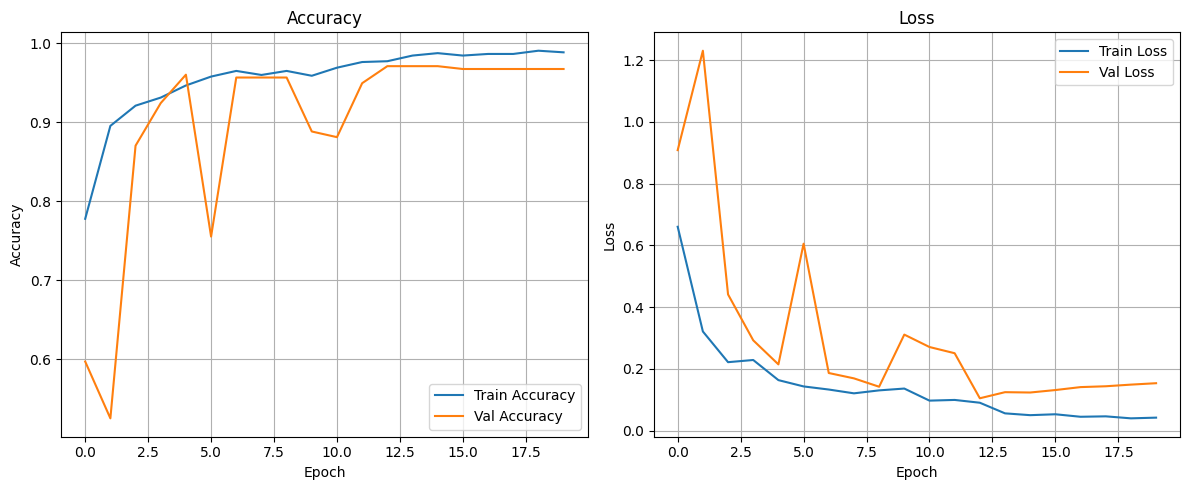

In [32]:
# Plot akurasi dan validasi

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
# Menyimpan model

model.export("submission/saved_model")

Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_59')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140148407270672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007784720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007784912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007784336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146011516624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007784528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007773200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007783760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007783376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140146007783184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14014

In [34]:
# Membuat tflite

import tensorflow as tf
import os

os.makedirs("submission/tflite", exist_ok=True)

converter = tf.lite.TFLiteConverter.from_saved_model("submission/saved_model")
tflite_model = converter.convert()

with open("submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)


In [35]:
# Membuat label.txt

with open("submission/tflite/label.txt", "w") as f:
    for name in train_ds.class_names:
        f.write(name + "\n")


In [36]:
# Membuat tfjs_model

!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    submission/saved_model \
    submission/tfjs_model


2025-11-21 03:59:36.571836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763697576.775368   39818 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763697576.834976   39818 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763697577.061630   39818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763697577.061674   39818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763697577.061678   39818 computation_placer.cc:177] computation placer alr

In [46]:
# Membuat requirements.txt

!pip freeze > submission/requirements.txt


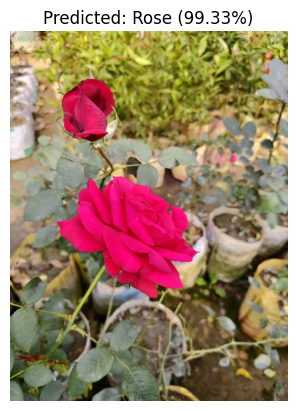

('Rose', np.float32(0.9933308))

In [ ]:
# Inference

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

model = tf.saved_model.load("submission/saved_model")
infer = model.signatures["serving_default"]
input_name = list(infer.structured_input_signature[1].keys())[0]

def predict(img_path):
    img = Image.open(img_path).resize((224,224))
    img_show = Image.open(img_path)

    x = np.array(img).astype("float32")
    x = np.expand_dims(x, 0)

    output = infer(**{input_name: tf.constant(x)})
    probs = output["output_0"].numpy()[0]
    pred_idx = probs.argmax()
    pred_label = train_ds.class_names[pred_idx]

    plt.imshow(img_show)
    plt.title(f"Predicted: {pred_label} ({probs[pred_idx]*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return pred_label, probs[pred_idx]

# prediksi:
predict("/content/flowersfix/test/Rose/Rose-197.jpg")


In [45]:
# Akurasi Test
import numpy as np
import tensorflow as tf

saved = tf.saved_model.load("submission/saved_model")
infer = saved.signatures["serving_default"]
input_name = list(infer.structured_input_signature[1].keys())[0]

correct = 0
total = 0

for x, y_true in test_ds:
    output = infer(**{input_name: x})["output_0"]
    y_pred = tf.argmax(output, axis=1)
    y_pred = tf.cast(y_pred, tf.int64)
    y_true = tf.cast(y_true, tf.int64)
    correct += tf.reduce_sum(tf.cast(y_pred == y_true, tf.int32)).numpy()
    total += y_true.shape[0]

print("Test Accuracy:", correct / total)




Test Accuracy: 0.9862068965517241
